<div style="position: relative; bottom: 10px; right: 10px; background-color:#4CAF50; padding:20px; color:white; border-radius:10px;">
    <h1 style="font-size:30px; margin:0; text-align:center;">Cab Price Comparison Platform</h1>
    <p style="font-size:20px; text-align:center; margin:20px 0;">Dataset: <em>Uber & Lyft Cab Prices (from Kaggle)</em></p>
    <p style="font-size:16px; margin-top: 70px; text-align:right;">
        By:<br> 
        <strong>Karan Shrestha - 20087</strong><br>
        <strong>& Theint Thinzar Aung - 19987</strong>
    </p>
</div>


<div align="center">
    <h1>Project Outline</h1>
</div>


<ul>
    <li><strong>1. Introduction</strong>
        <ul>
            <li>Project Overview</li>
            <li>Objectives</li>
        </ul>
    </li>
    <li><strong>2. Business Understanding</strong>
        <ul>
            <li>Problem Statement</li>
            <li>Solution</li>
        </ul>
    </li>
    <li><strong>3. Data Understanding&Data Integration</strong>
        <ul>
            <li>Dataset Overview</li>
            <li>Dataset Description</li>
            <li>Data Integration</li>
        </ul>
    </li>
  <li><strong>4. Data Preparation</strong>
        <ul>
            <li>Exploratory Data Analysis (EDA) , Data Cleaning, Data Transformation </li>
            <li>Data Visualization</li>
        </ul>    </li>
    <li><strong>5. Modeling, Analysis & Model Evaluation</strong>
        <ul>
            <li>Surge Multiplier Model (For Lyft) </li>
            <li>Price Prediction Model (For Lyft) </li>
            <li>Price Prediction Model (FOr Uber) </li>
        </ul>
    <li><strong>6. Conclusion</strong>
    <li><strong>7. Future Work</strong>
    </li>
    <li><strong>8. Prediction Pipeline</strong>
    </li>
</ul>


<div align="center">
    <h2>1.Introduction</h2>
</div>

#### Project Overview

The goal of this project is to develop a platform that enables users to easily compare prices, travel times, and services from different cab providers like Uber, Lyft, and other potential transportation services. The aim is to provide an all-in-one solution for users to make informed decisions based on real-time data and pricing analytics.

#### Objectives

- To create a user-friendly platform for comparing transportation options.
- To predict pricing based on weather, distance, time, and other factors using machine learning models.
- To provide actionable insights to businesses and users alike.




<div align="center">
    <h2>2.Business Understanding And Problems</h2>
</div>

#### Problem Statement

Users often face difficulty in comparing cab prices, estimated times of arrival (ETAs), and service options across different platforms like Uber and Lyft. Pricing inconsistencies, surge multipliers, and fluctuating availability make it challenging for users to make informed decisions. Our platform aims to solve this problem by consolidating data and providing transparent, comparative insights.

#### Solution

The project offers a comparative platform where users can easily check Uber, Lyft, and other services' prices, ETAs, and available ride types. In addition, businesses can use the data for demand forecasting, resource allocation, and competitive analysis.



<div align="center">
    <h2>3.Data Understanding & Integration</h2>
</div>



#### Overview:
This section provides insights into the datasets used, their key attributes, and how they were integrated to analyze the relationship between Cab Type,Distance,Surge Multiplier, weather conditions, Time Data and cab prices.

#### Dataset Description:
- **Cab Rides Dataset**: This dataset contains 10 columns and 693,070 rows. It includes information such as:
  - **Cab Type** (Uber, Lyft)
  - **Price** 
  - **Distance**
  - **Surge Multiplier**
  - **Location and Time Data**
  
- **Weather Dataset**: This dataset has 8 columns and 6,275 rows. It provides weather data including:
  - **Temperature**
  - **Precipitation (Rain)**
  - **Humidity**
  - **Wind Speed**
  - **Cloud Cover**

#### Data Integration:
- The two datasets were merged based on location and timestamp.
- This integrated dataset allows us to analyze how weather conditions (e.g., temperature, rain, etc.) influence pricing for Uber and Lyft services.
- The combined dataset provides 15 columns and serves as the basis for predictive modeling and analysis.


<div align="center">
    <h2>4.Loading Libraries</h2>
</div>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

<div align="center">
    <h2>5.Load Data</h2>
</div>

In [29]:
#load the data
ride_data = pd.read_csv("data/cab_rides.csv")
weather_data = pd.read_csv("data/weather.csv")


<div align="center">
    <h2>6.Summarize Data</h2>
</div>

In [31]:
ride_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [32]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


<div align="center">
    <h2>7.Data Preparation</h2>
</div>

#### Exploratory Data Analysis (EDA) , Data Cleaning, Data Transformation , Feature Selection

In [38]:
#view the first few rows
ride_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [40]:
print(weather_data.head())

    temp            location  clouds  pressure    rain  time_stamp  humidity  \
0  42.42            Back Bay     1.0   1012.14  0.1228  1545003901      0.77   
1  42.43         Beacon Hill     1.0   1012.15  0.1846  1545003901      0.76   
2  42.50   Boston University     1.0   1012.15  0.1089  1545003901      0.76   
3  42.11              Fenway     1.0   1012.13  0.0969  1545003901      0.77   
4  43.13  Financial District     1.0   1012.14  0.1786  1545003901      0.75   

    wind  
0  11.25  
1  11.32  
2  11.07  
3  11.09  
4  11.49  


In [42]:
print(ride_data['source'].unique())
print(ride_data['source'].nunique())

['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
12


In [44]:
print(weather_data['location'].unique())
print(weather_data['location'].nunique())

['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']
12


In [46]:
ride_data['datetime'] = pd.to_datetime(ride_data['time_stamp'], unit='ms')
weather_data['datetime'] = pd.to_datetime(weather_data['time_stamp'], unit='s')

In [48]:
# Map locations to sources/destinations for merging
weather_data.rename(columns={'location': 'source'},inplace=True)

In [50]:
weather_data.isnull().sum()

temp             0
source           0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
datetime         0
dtype: int64

In [52]:
weather_data.fillna(0,inplace=True)  # filling with 0 means no rain

In [54]:
#count missing values in each column
print(ride_data.isnull().sum())

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
datetime                0
dtype: int64


In [56]:
null_ride_data = ride_data.loc[np.isnan(ride_data['price'])]
null_ride_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 14:13:04.211
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-02 23:52:56.318
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-29 20:38:05.298
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-13 20:10:16.318
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-30 13:08:03.653
...,...,...,...,...,...,...,...,...,...,...,...
693025,2.50,Uber,1544886913192,Beacon Hill,South Station,NaN,1.0,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-15 15:15:13.192
693047,0.91,Uber,1543456028123,Beacon Hill,Haymarket Square,NaN,1.0,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-29 01:47:08.123
693049,1.79,Uber,1543456028123,Beacon Hill,North End,NaN,1.0,885ef635-299e-45cf-8052-c45a39e9822a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-29 01:47:08.123
693060,1.61,Uber,1543728484149,Haymarket Square,Theatre District,NaN,1.0,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-02 05:28:04.149


In [58]:
null_ride_data['cab_type'].value_counts()

cab_type
Uber    55095
Name: count, dtype: int64

In [60]:
ride_data['cab_type'].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [62]:
ride_data['surge_multiplier'].value_counts()

surge_multiplier
1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

In [64]:
null_ride_data['surge_multiplier'].value_counts()

surge_multiplier
1.0    55095
Name: count, dtype: int64

In [66]:
ride_data.dropna(inplace= True)
ride_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223


In [68]:
ride_data_combined = pd.merge_asof(
    ride_data.sort_values('datetime'),
    weather_data.sort_values('datetime'),
    on='datetime',
    by='source',
    direction='backward'
)

In [70]:
drop_columns = ['id','product_id','time_stamp_x','time_stamp_y','destination','source']
final_data = ride_data_combined.drop(drop_columns,axis=1)

In [72]:
final_data.head()

,distance,cab_type,price,surge_multiplier,name,datetime,temp,clouds,pressure,rain,humidity,wind
0,3.03,Lyft,34.0,1.0,Lux Black XL,2018-11-26 03:40:46.318,41.07,0.86,1014.39,0.0,0.92,1.36
1,1.30,Uber,18.5,1.0,Black,2018-11-26 03:40:46.319,40.86,0.87,1014.39,0.0,0.93,1.60
2,2.43,Lyft,10.5,1.0,Lyft,2018-11-26 03:40:46.320,40.81,0.89,1014.35,0.0,0.93,1.36
3,2.71,Uber,32.0,1.0,UberXL,2018-11-26 03:40:46.320,40.80,0.87,1014.39,0.0,0.93,1.55
4,2.71,Uber,19.5,1.0,UberX,2018-11-26 03:40:46.320,40.80,0.87,1014.39,0.0,0.93,1.55


In [74]:
# Extract features and create new columns
final_data['month'] = final_data['datetime'].dt.month         # Extract month
final_data['day_of_week'] = final_data['datetime'].dt.dayofweek + 1  # Extract day of week (0=Monday, 6=Sunday)
final_data['hour'] = final_data['datetime'].dt.hour           # Extract hour
final_data['minute'] = final_data['datetime'].dt.minute 
final_data.drop(['datetime'],axis=1,inplace=True)
final_data.head()

,distance,cab_type,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,month,day_of_week,hour,minute
0,3.03,Lyft,34.0,1.0,Lux Black XL,41.07,0.86,1014.39,0.0,0.92,1.36,11,1,3,40
1,1.30,Uber,18.5,1.0,Black,40.86,0.87,1014.39,0.0,0.93,1.60,11,1,3,40
2,2.43,Lyft,10.5,1.0,Lyft,40.81,0.89,1014.35,0.0,0.93,1.36,11,1,3,40
3,2.71,Uber,32.0,1.0,UberXL,40.80,0.87,1014.39,0.0,0.93,1.55,11,1,3,40
4,2.71,Uber,19.5,1.0,UberX,40.80,0.87,1014.39,0.0,0.93,1.55,11,1,3,40


In [76]:
data_uber = final_data.loc[final_data['cab_type']=='Uber'].drop(['cab_type'],axis=1)
data_lyft = final_data.loc[final_data['cab_type']=='Lyft'].drop(['cab_type'],axis=1)

#### Data Visualization

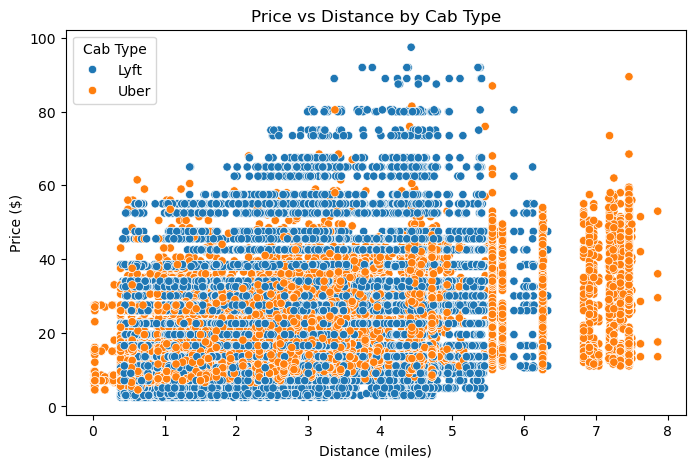

In [79]:
# 1. Price vs Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x="distance", y="price", hue="cab_type", data=final_data)
plt.title("Price vs Distance by Cab Type")
plt.xlabel("Distance (miles)")
plt.ylabel("Price ($)")
plt.legend(title="Cab Type")
plt.show()

**Observation:**
> **Lyft tends to have a slightly higher price range for shorter distances compared to Uber.
The overall trend for both services shows a proportional increase in price with distance, but the price variation is more evident for Lyft at longer distances.**


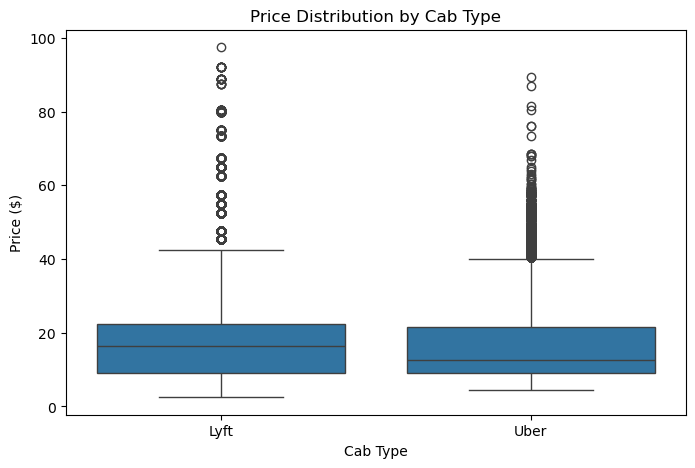

In [81]:
# 2. Price Distribution by Cab Type
plt.figure(figsize=(8, 5))
sns.boxplot(x="cab_type", y="price", data=final_data)
plt.title("Price Distribution by Cab Type")
plt.xlabel("Cab Type")
plt.ylabel("Price ($)")
plt.show()

**Observation:**
> **Lyft shows a wider spread in price, indicating more variability (possibly due to premium services or surge pricing).
Both Lyft and Uber have significant outliers, particularly Lyft, where prices can reach up to $100.**


C:\Users\kskar\AppData\Local\Temp\ipykernel_28688\3256455718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= final_data, x='cab_type', palette='muted')


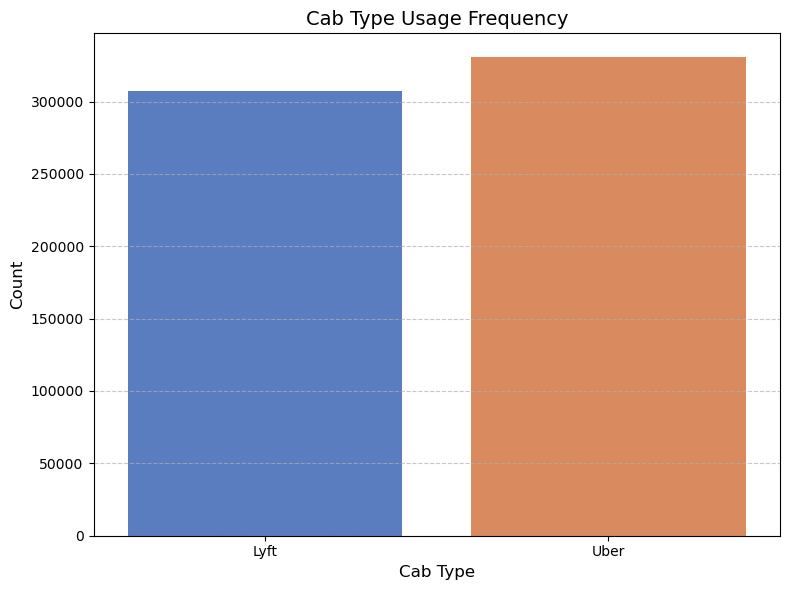

In [83]:
# 3. Cab Type Usage (Frequency Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data= final_data, x='cab_type', palette='muted')
plt.title('Cab Type Usage Frequency', fontsize=14)
plt.xlabel('Cab Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

**Observation:**
> **Uber currently leads in usage frequency, which reflects its larger market share and broader user adoption. However, Lyft still maintains a significant portion of the market**

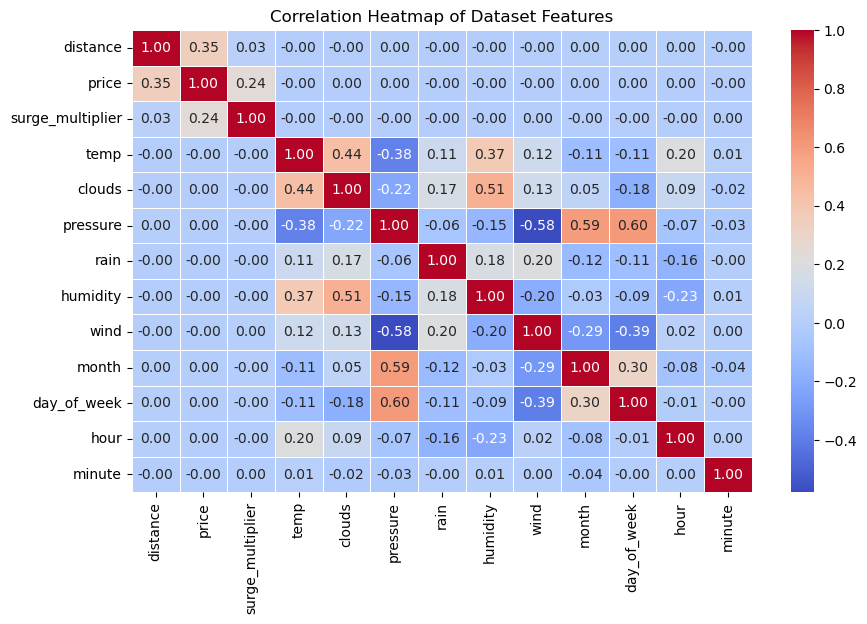

In [85]:
# Compute the correlation matrix
correlation_matrix = final_data.drop(['name','cab_type'],axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Dataset Features")
plt.show()

**Observation:**
> **Distance and Price (0.35):
A moderate positive correlation exists between distance and price, as expected. Longer trips generally result in higher fares.**

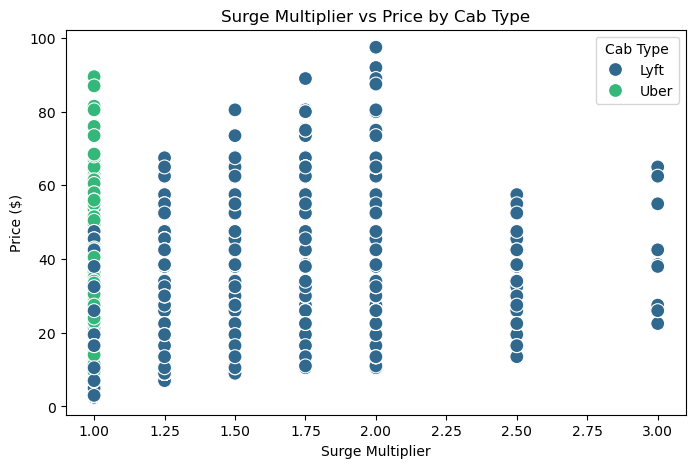

In [87]:
# 1. Surge Multiplier vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x="surge_multiplier", y="price", hue="cab_type", data=final_data, palette="viridis", s=100)
plt.title("Surge Multiplier vs Price by Cab Type")
plt.xlabel("Surge Multiplier")
plt.ylabel("Price ($)")
plt.legend(title="Cab Type")
plt.show()

**Observation:**
> **Observations Prices increase consistently with higher surge multipliers for both Lyft and Uber.**

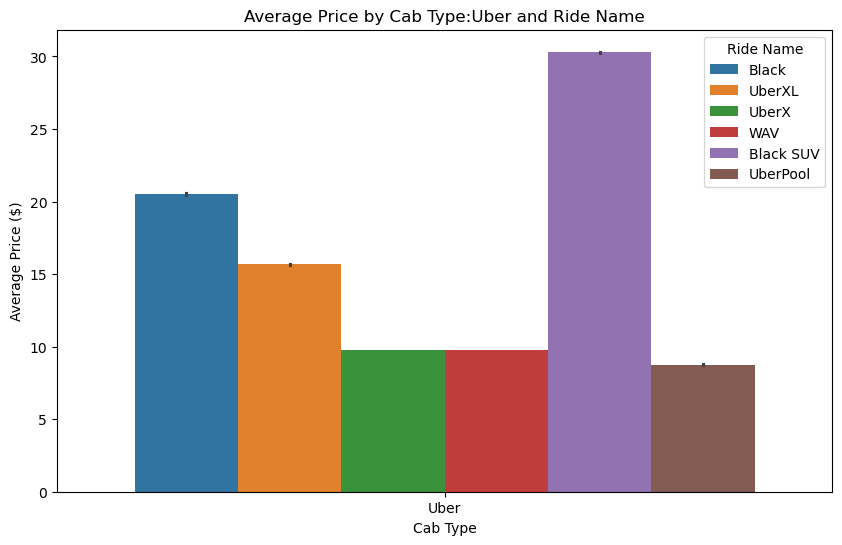

In [89]:
# 3. Average Price by Cab Type and Ride Name
plt.figure(figsize=(10, 6))
sns.barplot(x="cab_type", y="price", hue="name", data=final_data.loc[final_data['cab_type']=='Uber'])
plt.title("Average Price by Cab Type:Uber and Ride Name")
plt.xlabel("Cab Type")
plt.ylabel("Average Price ($)")
plt.legend(title="Ride Name")
plt.show()

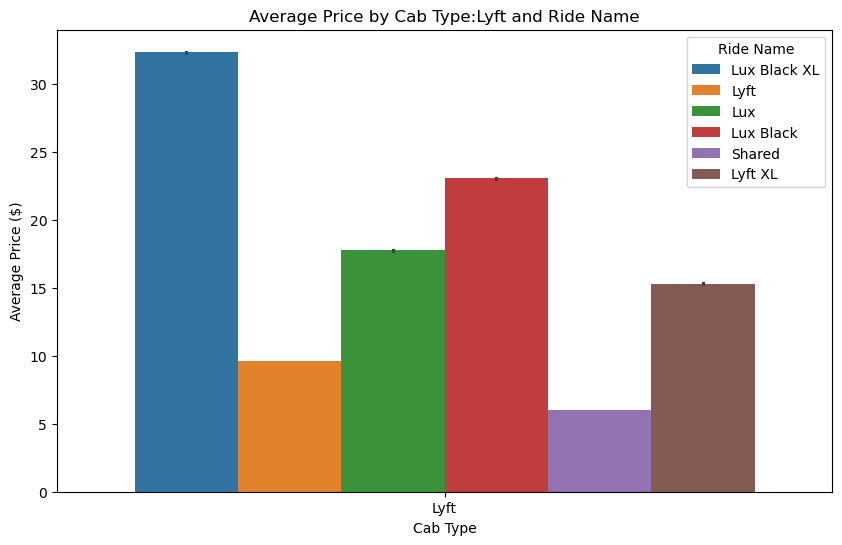

In [90]:
# 3. Average Price by Cab Type and Ride Name
plt.figure(figsize=(10, 6))
sns.barplot(x="cab_type", y="price", hue="name", data=final_data.loc[final_data['cab_type']=='Lyft'])
plt.title("Average Price by Cab Type:Lyft and Ride Name")
plt.xlabel("Cab Type")
plt.ylabel("Average Price ($)")
plt.legend(title="Ride Name")
plt.show()

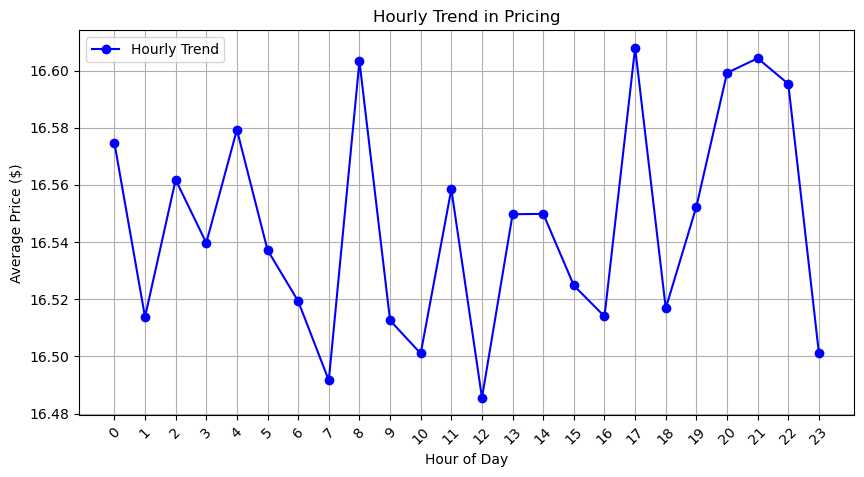

In [91]:

# Calculate average price by hour
avg_price_by_hour = final_data.groupby('hour')['price'].mean()

# Plot hourly trend
plt.figure(figsize=(10, 5))
plt.plot(avg_price_by_hour.index, avg_price_by_hour.values, marker='o', color='blue', label='Hourly Trend')

# Adding labels and legend
plt.title('Hourly Trend in Pricing')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price ($)')
plt.xticks(avg_price_by_hour.index, rotation=45)
plt.legend()
plt.grid(True)

plt.show()


In [74]:
final_data.groupby('day_of_week')['price'].mean().reindex(weekday_order)

day_of_week
Monday      NaN
Tuesday     NaN
Wednesday   NaN
Thursday    NaN
Friday      NaN
Saturday    NaN
Sunday      NaN
Name: price, dtype: float64

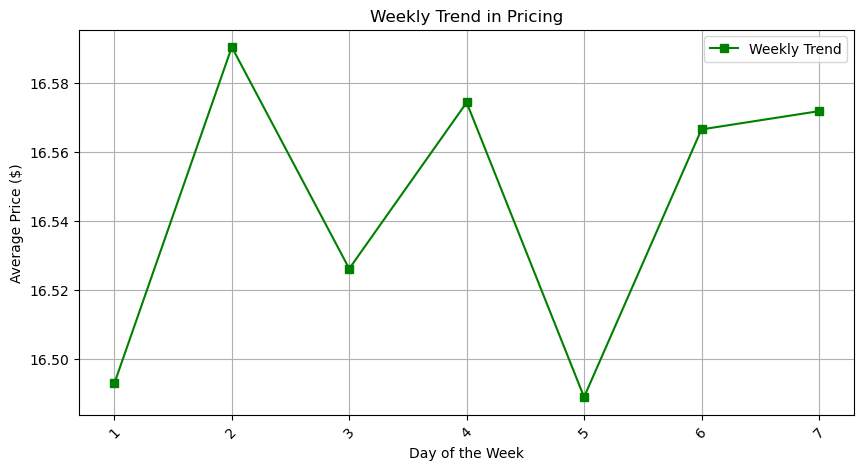

In [92]:

# Calculate average price by day of the week
avg_price_by_weekday = final_data.groupby('day_of_week')['price'].mean()

# Reorder the weekdays for proper visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot weekly trend
plt.figure(figsize=(10, 5))
plt.plot(avg_price_by_weekday.index, avg_price_by_weekday.values, marker='s', color='green', label='Weekly Trend')

# Adding labels and legend
plt.title('Weekly Trend in Pricing')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


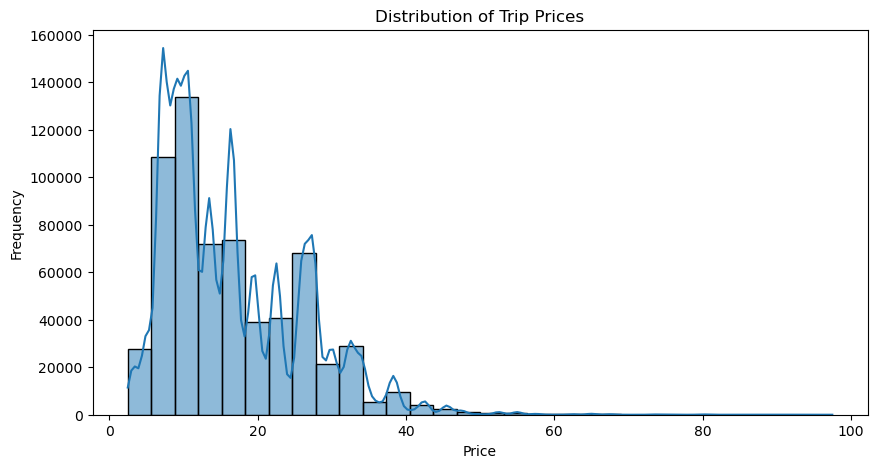

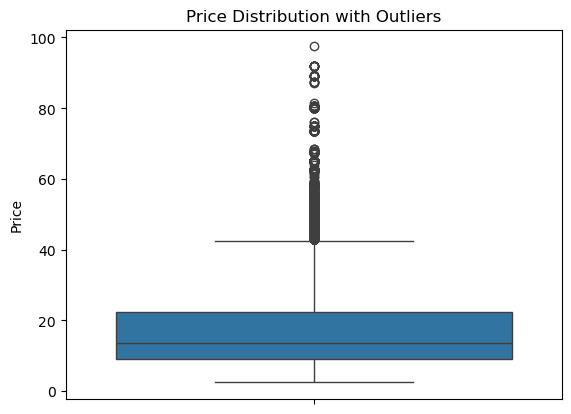

In [93]:
# Distribution of Trip Prices
# Outlier Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for trip prices
plt.figure(figsize=(10, 5))
sns.histplot(final_data['price'], bins=30, kde=True)
plt.title('Distribution of Trip Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot for price distribution
sns.boxplot(y=final_data['price'])
plt.title('Price Distribution with Outliers')
plt.ylabel('Price')
plt.show()


<div align="center">
    <h2>8.Model Training & Model Evaluation</h2>
</div>

#### Surge Charge Model (Lyft)

In [96]:
data_lyft.surge_multiplier.unique()

array([1.  , 1.75, 1.25, 1.5 , 2.  , 2.5 , 3.  ])

In [97]:
data_lyft.name.unique()

array(['Lux Black XL', 'Lyft', 'Lux', 'Lux Black', 'Shared', 'Lyft XL'],
      dtype=object)

In [99]:
data_surge = data_lyft[['temp', 'clouds','pressure', 'rain', 'humidity', 'wind','surge_multiplier']]

In [100]:
data_surge

,temp,clouds,pressure,rain,humidity,wind,surge_multiplier
0,41.07,0.86,1014.39,0.0,0.92,1.36,1.00
2,40.81,0.89,1014.35,0.0,0.93,1.36,1.00
9,41.07,0.86,1014.39,0.0,0.92,1.36,1.75
10,41.07,0.86,1014.39,0.0,0.92,1.36,1.75
11,40.80,0.87,1014.39,0.0,0.93,1.55,1.00
...,...,...,...,...,...,...,...
637971,30.91,0.00,1012.34,0.0,0.46,13.06,1.00
637972,30.91,0.00,1012.34,0.0,0.46,13.06,1.00
637973,30.91,0.00,1012.34,0.0,0.46,13.06,1.00
637974,30.91,0.00,1012.34,0.0,0.46,13.06,1.00


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare the dataset
# Rename the dataframe to data_surge
# data_surge = data_lyft.copy()  # If you have the data in `data_lyft`, copy it to `data_surge`

# Select the required columns
features = ['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']
target = 'surge_multiplier'

# Convert 'surge_multiplier' to a categorical type before applying label encoding
data_surge['surge_multiplier'] = data_surge['surge_multiplier'].astype('category')


C:\Users\kskar\AppData\Local\Temp\ipykernel_28688\3517723857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surge['surge_multiplier'] = data_surge['surge_multiplier'].astype('category')


In [103]:
data_surge

,temp,clouds,pressure,rain,humidity,wind,surge_multiplier
0,41.07,0.86,1014.39,0.0,0.92,1.36,1.00
2,40.81,0.89,1014.35,0.0,0.93,1.36,1.00
9,41.07,0.86,1014.39,0.0,0.92,1.36,1.75
10,41.07,0.86,1014.39,0.0,0.92,1.36,1.75
11,40.80,0.87,1014.39,0.0,0.93,1.55,1.00
...,...,...,...,...,...,...,...
637971,30.91,0.00,1012.34,0.0,0.46,13.06,1.00
637972,30.91,0.00,1012.34,0.0,0.46,13.06,1.00
637973,30.91,0.00,1012.34,0.0,0.46,13.06,1.00
637974,30.91,0.00,1012.34,0.0,0.46,13.06,1.00


In [106]:
# Now, apply Label Encoding
label_encoder = LabelEncoder()
label_encoder.fit_transform(data_surge['surge_multiplier'])
data_surge['surge_multiplier'] = label_encoder.transform(data_surge['surge_multiplier'])
# label_encoder.inverse_transform([[0]])

C:\Users\kskar\AppData\Local\Temp\ipykernel_28688\1520000315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surge['surge_multiplier'] = label_encoder.transform(data_surge['surge_multiplier'])


In [108]:
import joblib

joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [109]:
label_encoder_load = joblib.load('label_encoder.pkl')
label_encoder_load.inverse_transform([[0]])

C:\Users\kskar\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.])

In [110]:
data_surge['surge_multiplier']

0         0
2         0
9         3
10        3
11        0
         ..
637971    0
637972    0
637973    0
637974    0
637975    0
Name: surge_multiplier, Length: 307408, dtype: int64

In [111]:


# Split the data into train+validation and test sets
X = data_surge[features]
y = data_surge['surge_multiplier']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)



### Using Decision Tree

In [115]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [131]:
clf.score(X_val,y_val)

0.9316385283497609

### Using Xgboost Classifier

In [ ]:

# Step 2: Define preprocessing and pipeline
# Scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), features)
    ]
)

# Create a pipeline with preprocessor and XGBoost classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])


In [135]:
pipeline.fit(X_train, y_train)

C:\Users\kskar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['temp', 'clouds', 'pressure',
                                                   'rain', 'humidity',
                                                   'wind'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [137]:
pipeline.score(X_val,y_val)

0.9317686477342962

### Hyperparameter Tuning

In [142]:
# Step 3: Define parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\kskar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['temp',
                                                                          'clouds',
                                                                          'pressure',
                                                                          'rain',
                                                                          'humidity',
                                                                          'wind'])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=N...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [50, 100],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [143]:
# Step 4: Evaluate the best model
best_model_surge = grid_search.best_estimator_
best_params = grid_search.best_params_
joblib.dump(best_model_surge, 'best_model_surge.pkl')
best_model_surge_loaded = joblib.load('best_model_surge.pkl')


In [144]:


# Validation accuracy
y_val_pred = best_model_surge_loaded.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Test accuracy
y_test_pred = best_model_surge_loaded.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Classification report on the test set
test_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_.astype(str))

# Step 5: Display results
print("Best Parameters:", best_params)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:\n", test_report)

Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8}
Validation Accuracy: 0.9317686477342962
Test Accuracy: 0.9317686477342962

Classification Report on Test Set:
               precision    recall  f1-score   support

         1.0       0.93      1.00      0.96     57287
        1.25       0.00      0.00      0.00      2217
         1.5       0.00      0.00      0.00      1013
        1.75       0.00      0.00      0.00       484
         2.0       0.00      0.00      0.00       448
         2.5       0.00      0.00      0.00        31
         3.0       0.00      0.00      0.00         2

    accuracy                           0.93     61482
   macro avg       0.13      0.14      0.14     61482
weighted avg       0.87      0.93      0.90     61482



C:\Users\kskar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kskar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kskar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
test_precision = precision_score(y_test, y_test_pred, average='weighted')  # Precision
test_recall = recall_score(y_test, y_test_pred, average='weighted')  # Recall
test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

Test Precision: 0.868192812900599
Test Recall: 0.9317686477342962
Test F1-Score: 0.8988579599517488


C:\Users\kskar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Price Prediction Model (Lyft)

In [185]:
# Convert 'surge_multiplier' to categorical
data_lyft['surge_multiplier'] = data_lyft['surge_multiplier'].astype('category')

# Features and target
X = data_lyft[['distance', 'surge_multiplier', 'name', 'day_of_week', 'hour', 'minute']]

y = data_lyft['price']

In [187]:
X

,distance,surge_multiplier,name,day_of_week,hour,minute
0,3.03,1.00,Lux Black XL,1,3,40
2,2.43,1.00,Lyft,1,3,40
9,4.46,1.75,Lux,1,3,40
10,4.46,1.75,Lux Black,1,3,40
11,2.22,1.00,Shared,1,3,40
...,...,...,...,...,...,...
637971,2.40,1.00,Lyft XL,2,19,15
637972,2.40,1.00,Lux Black XL,2,19,15
637973,2.40,1.00,Shared,2,19,15
637974,2.40,1.00,Lyft,2,19,15


In [189]:
class LabelEncoderPipeline(LabelEncoder):
    def fit(self, X, y=None):
        super().fit(X)
        return self

    def transform(self, X):
        # Ensure the output is 2D
        return super().transform(X).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        # Ensure the output is 2D
        return super().fit_transform(X).reshape(-1, 1)


In [191]:
# Initial split: Train-Test split
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split Train into Train_Train and Train_Val
X_train_train_lyft, X_train_val_lyft, y_train_train_lyft, y_train_val_lyft = train_test_split(X_train_lyft, y_train_lyft, test_size=0.25, random_state=42)  # 25% of 80% = 20%

# Confirming the splits
print(f"Train_Train: {X_train_train_lyft.shape}, Train_Val: {X_train_val_lyft.shape}, Test: {X_test_lyft.shape}")

Train_Train: (184444, 6), Train_Val: (61482, 6), Test: (61482, 6)


In [193]:
# Preprocessing pipeline
preprocessor_lyft = ColumnTransformer(
    transformers=[
        ('label', LabelEncoderPipeline(), 'surge_multiplier'),  # Label encode 'surge_multiplier'
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['name'])    # One-hot encode 'name'
    ],
    remainder='passthrough'  # Keep other columns as-is
)

# Ensure X_train_train is properly formatted as a DataFrame
X_train_train_lyft = X_train_train_lyft.reset_index(drop=True)
X_train_val_lyft = X_train_val_lyft.reset_index(drop=True)
X_test_lyft = X_test_lyft.reset_index(drop=True)





<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  LabelEncoderPipeline(),
                                                  'surge_multiplier'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=Non

In [197]:
X_train_train_lyft

,distance,surge_multiplier,name,day_of_week,hour,minute
0,2.78,1.0,Lux Black XL,7,4,15
1,2.73,1.0,Shared,1,7,2
2,3.18,1.0,Lux,4,3,54
3,2.42,1.0,Shared,4,18,2
4,1.44,1.0,Lux Black,2,2,50
...,...,...,...,...,...,...
184439,4.75,1.0,Lyft XL,1,20,5
184440,1.06,1.0,Shared,1,3,12
184441,1.54,1.0,Lyft,2,18,33
184442,1.54,1.0,Lyft,1,14,2


## Using SVR model

In [203]:
from sklearn.svm import SVR

In [209]:
# Define the full pipeline
pipeline_lyft_svr = Pipeline(steps=[
    ('preprocessor', preprocessor_lyft),
    ('regressor', SVR())
])

In [211]:
pipeline_lyft_svr.fit(X_train_train_lyft, y_train_train_lyft)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  LabelEncoderPipeline(),
                                                  'surge_multiplier'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name'])])),
                ('regressor', SVR())])

In [212]:
pipeline_lyft_svr.score(X_train_val_lyft,y_train_val_lyft)

0.9156002070817291

## Using XGBoost Regressor

In [217]:
# Define the full pipeline
pipeline_lyft = Pipeline(steps=[
    ('preprocessor', preprocessor_lyft),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

In [218]:
pipeline_lyft.fit(X_train_train_lyft, y_train_train_lyft)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  LabelEncoderPipeline(),
                                                  'surge_multiplier'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [219]:
pipeline_lyft.score(X_train_val_lyft,y_train_val_lyft)

0.9773853879767471

## Hyperparameter Tuning Xgboost regressor

In [235]:


# Perform GridSearchCV on Train_Train and validate on Train_Val
param_grid_lyft = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__subsample': [0.8, 1.0]
}

In [222]:
grid_search_lyft = GridSearchCV(pipeline_lyft, param_grid_lyft, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_lyft.fit(X_train_train_lyft, y_train_train_lyft)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('label',
                                                                         LabelEncoderPipeline(),
                                                                         'surge_multiplier'),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['name'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsa...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [223]:
best_model_lyft_pred = grid_search_lyft.best_estimator_
joblib.dump(best_model_lyft_pred, 'best_model_lyft.pkl')
best_model_lyft_loaded = joblib.load('best_model_lyft.pkl')

In [224]:
# Retrieve the best estimator from the grid search
# best_pipeline_lyft = grid_search_lyft.best_estimator_

# Access the LabelEncoder used for 'surge_multiplier' in the preprocessor
label_encoder = best_model_lyft_loaded.named_steps['preprocessor'].named_transformers_['label']

# # Get the encoded mapping (classes_)
# encoded_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# # Print the encoded mapping
# print(encoded_mapping)


In [225]:
from sklearn.metrics import mean_squared_error, r2_score

# Best model and score
# best_model_lyft = grid_search_lyft.best_estimator_
best_params_lyft = grid_search_lyft.best_params_
best_score_lyft = grid_search_lyft.best_score_

# Validate on Train_Val
y_val_pred_lyft = best_model_lyft_loaded.predict(X_train_val_lyft)
val_mse = mean_squared_error(y_train_val_lyft, y_val_pred_lyft)

# Evaluate on Test set
y_test_pred_lyft = best_model_lyft_loaded.predict(X_test_lyft)
test_mse = mean_squared_error(y_test_lyft, y_test_pred_lyft)

val_r2 = r2_score(y_train_val_lyft, y_val_pred_lyft)
test_r2 = r2_score(y_test_lyft, y_test_pred_lyft)

print("Best Parameters:", best_params_lyft)
print("Best Cross-Validated Score (MSE):", -best_score_lyft)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

print("Validation R²:", val_r2)
print("Test R²:", test_r2)

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
Best Cross-Validated Score (MSE): 2.3177217661031198
Validation MSE: 2.2727575713968906
Test MSE: 2.282497968998222
Validation R²: 0.977577413151889
Test R²: 0.9774275222226422


In [126]:
X_val

,temp,clouds,pressure,rain,humidity,wind
317863,38.29,1.00,1020.70,0.0029,0.83,2.62
511676,51.88,0.72,1021.59,0.0000,0.75,6.68
373027,52.79,0.73,999.95,0.0000,0.86,6.60
70194,44.65,0.95,988.27,0.0000,0.91,6.62
285972,32.52,0.40,1022.14,0.0000,0.79,4.32
...,...,...,...,...,...,...
57128,44.01,1.00,993.15,0.0237,0.95,8.97
453949,27.91,0.35,1034.70,0.0000,0.77,2.45
375520,54.62,0.66,999.87,0.0000,0.79,7.50
202208,37.31,0.22,1005.06,0.0000,0.68,8.75


#### Price Prediction Model (Uber)

In [237]:
data_uber

,distance,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,month,day_of_week,hour,minute
1,1.30,18.5,1.0,Black,40.86,0.87,1014.39,0.0,0.93,1.60,11,1,3,40
3,2.71,32.0,1.0,UberXL,40.80,0.87,1014.39,0.0,0.93,1.55,11,1,3,40
4,2.71,19.5,1.0,UberX,40.80,0.87,1014.39,0.0,0.93,1.55,11,1,3,40
5,2.19,17.5,1.0,Black,41.02,0.87,1014.39,0.0,0.92,1.50,11,1,3,40
6,3.05,10.5,1.0,WAV,40.94,0.89,1014.35,0.0,0.92,1.43,11,1,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637966,2.66,33.5,1.0,Black SUV,30.93,0.00,1012.35,0.0,0.45,12.99,12,2,19,15
637967,2.66,11.0,1.0,UberPool,30.93,0.00,1012.35,0.0,0.45,12.99,12,2,19,15
637968,2.66,11.5,1.0,UberX,30.93,0.00,1012.35,0.0,0.45,12.99,12,2,19,15
637969,2.66,11.5,1.0,WAV,30.93,0.00,1012.35,0.0,0.45,12.99,12,2,19,15


In [239]:
X = data_uber[['distance', 'name', 'day_of_week', 'hour', 'minute','temp',	'clouds',	'pressure',	'rain',	'humidity',	'wind']]
# X = data_uber[['distance', 'name']]

y = data_uber['price']

In [241]:
# Initial split: Train-Test split
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split Train into Train_Train and Train_Val
X_train_train_uber, X_train_val_uber, y_train_train_uber, y_train_val_uber = train_test_split(X_train_uber, y_train_uber, test_size=0.25, random_state=42)  # 25% of 80% = 20%

# Confirming the splits
print(f"Train_Train: {X_train_train_uber.shape}, Train_Val: {X_train_val_uber.shape}, Test: {X_test_uber.shape}")


Train_Train: (198340, 11), Train_Val: (66114, 11), Test: (66114, 11)


In [243]:
X_train_train_uber

,distance,name,day_of_week,hour,minute,temp,clouds,pressure,rain,humidity,wind
391843,1.03,UberPool,2,2,12,45.75,0.04,1003.19,0.0,0.60,7.84
229564,2.66,WAV,5,4,17,35.76,0.06,1013.14,0.0,0.69,5.49
504444,2.87,UberX,6,13,45,46.63,0.97,1022.14,0.0,0.88,3.79
62511,0.63,Black,2,11,15,45.44,0.99,989.76,0.0,0.94,3.42
77503,3.01,Black SUV,2,16,27,40.98,0.96,989.82,0.0,0.84,11.10
...,...,...,...,...,...,...,...,...,...,...,...
129175,1.94,UberXL,3,14,56,39.04,0.44,991.96,0.0,0.67,11.17
617357,1.44,UberPool,2,7,20,33.60,0.99,1002.47,0.0,0.61,13.22
70090,1.03,UberXL,2,13,54,44.78,0.95,988.25,0.0,0.90,6.56
300048,2.17,UberPool,6,20,52,40.92,0.63,1023.18,0.0,0.63,1.77


In [247]:
# Preprocessing pipeline
preprocessor_uber = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['name'])    # One-hot encode 'name'
    ],
    remainder='passthrough'  # Keep other columns as-is
)

# Ensure X_train_train is properly formatted as a DataFrame
X_train_train_uber = X_train_train_uber.reset_index(drop=True)
X_train_val_uber = X_train_val_uber.reset_index(drop=True)
X_test_uber = X_test_uber.reset_index(drop=True)



In [250]:
from sklearn.linear_model import LinearRegression

In [254]:
# Define the full pipeline
pipeline_uber_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_uber),
    ('regressor', LinearRegression())
])

In [256]:
pipeline_uber_lr.fit(X_train_train_uber, y_train_train_uber)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name'])])),
                ('regressor', LinearRegression())])

In [258]:
pipeline_uber_lr.score(X_train_val_uber,y_train_val_uber)

0.9193358325117518

## Using XgboostRegressor

In [261]:
# Define the full pipeline
pipeline_uber = Pipeline(steps=[
    ('preprocessor', preprocessor_uber),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

In [263]:
pipeline_uber.fit(X_train_train_uber, y_train_train_uber)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [265]:
pipeline_uber.score(X_train_val_uber,y_train_val_uber)

0.9487996195345002

## Hypterparameter tuning XGboostRegressor

In [267]:


# Perform GridSearchCV on Train_Train and validate on Train_Val
param_grid_uber = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__subsample': [0.8, 1.0]
}

In [269]:
grid_search_uber = GridSearchCV(pipeline_uber, param_grid_uber, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_uber.fit(X_train_train_uber, y_train_train_uber)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['name'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=N...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [270]:
best_model_uber_pred = grid_search_uber.best_estimator_
# joblib.dump(best_model_uber_pred, 'best_model_uber.pkl')
# best_model_uber_loaded = joblib.load('best_model_uber.pkl')
joblib.dump(best_model_uber_pred, 'best_model_uber_temp.pkl')
best_model_uber_loaded = joblib.load('best_model_uber_temp.pkl')

In [271]:
from sklearn.metrics import mean_squared_error, r2_score

# Best model and score
# best_model_lyft = grid_search_lyft.best_estimator_
best_params_uber = grid_search_uber.best_params_
best_score_uber = grid_search_uber.best_score_

# Validate on Train_Val
y_val_pred_uber = best_model_uber_loaded.predict(X_train_val_uber)
val_mse = mean_squared_error(y_train_val_uber, y_val_pred_uber)

# Evaluate on Test set
y_test_pred_uber = best_model_uber_loaded.predict(X_test_uber)
test_mse = mean_squared_error(y_test_uber, y_test_pred_uber)

val_r2 = r2_score(y_train_val_uber, y_val_pred_uber)
test_r2 = r2_score(y_test_uber, y_test_pred_uber)

print("Best Parameters:", best_params_uber)
print("Best Cross-Validated Score (MSE):", -best_score_uber)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

print("Validation R²:", val_r2)
print("Test R²:", test_r2)

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
Best Cross-Validated Score (MSE): 3.687982167449254
Validation MSE: 3.7486996436108075
Test MSE: 3.670837441501507
Validation R²: 0.9492772577693235
Test R²: 0.9498670697526437


<div align="center">
    <h2>9.Conclusion</h2>
</div>

The project successfully developed a platform for comparing Uber and Lyft prices, predicting prices based on distance, cab type , datetime and weather conditions,surge multiplier and providing actionable insights for both users and businesses. The machine learning models demonstrated good performance in predicting prices based on various features.

<div align="center">
    <h2>10.Future Work</h2>
</div>

- Expand the platform to include other transportation options, such as buses and trains.
- Integrate real-time pricing and weather data to provide dynamic, up-to-date comparisons.
- Implement more advanced predictive models for better accuracy and adaptability.



<div align="center">
    <h2>11.Prediction Pipeline</h2>
</div>

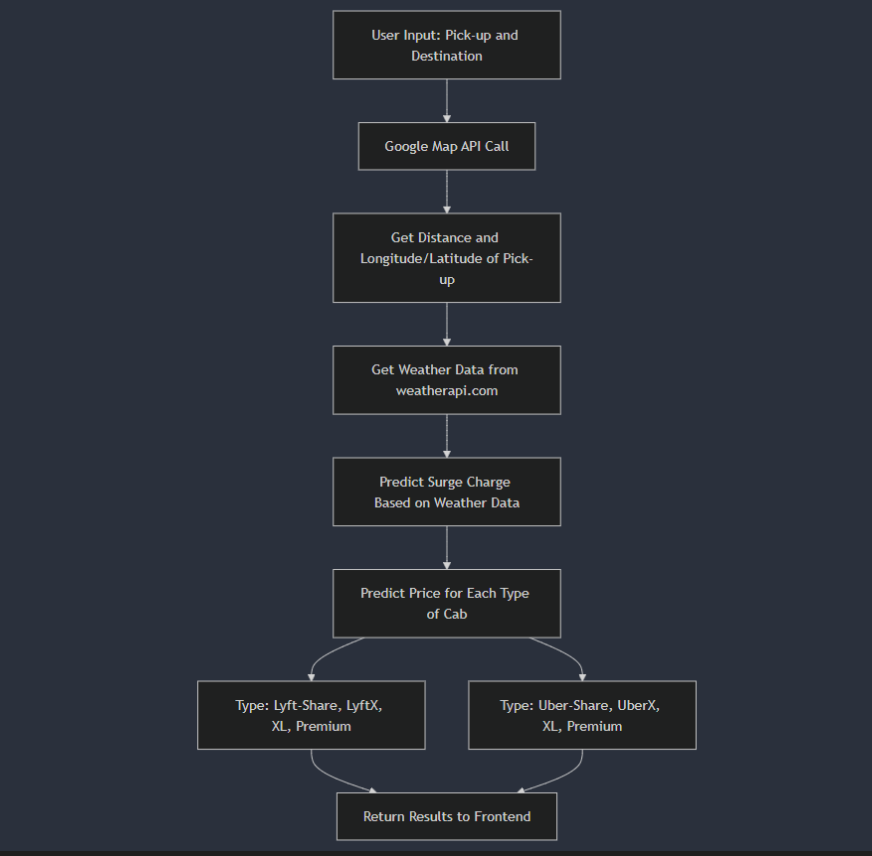